## Exploratory Data Analysis - Telco Churn Analysis

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the data

Customer_Info = pd.read_csv("Telco-Customer-Churn.csv")
Customer_Info

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Examining and cleaning the data

In [3]:
# Examining the data - datatypes
Customer_Info.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
Customer_Info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#Changing datatype for TotalCharges to float

Customer_Info.TotalCharges = pd.to_numeric(Customer_Info.TotalCharges, errors = "coerce", downcast = "float")


In [9]:
Customer_Info.TotalCharges.dtypes

dtype('float32')

In [7]:
# Checking for missing values
Customer_Info.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Demographics

In [10]:
Customer_Info.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### From the available columns, CustomerID, gender, SeniorCitizen, Partner and Dependents columns capture demographics data.


In [11]:
#Checking value counts for demographic columns

Customer_Info[["gender", "SeniorCitizen", "Partner", "Dependents"]].apply(pd.Series.value_counts)

,gender,SeniorCitizen,Partner,Dependents
0,NaN,5901.0,NaN,NaN
1,NaN,1142.0,NaN,NaN
Female,3488.0,NaN,NaN,NaN
Male,3555.0,NaN,NaN,NaN
No,NaN,NaN,3641.0,4933.0
Yes,NaN,NaN,3402.0,2110.0


In [14]:
#Replacing values of SeniorCitizen with Yes and No

Customer_Info.SeniorCitizen.replace(1, "Yes", inplace = True)
Customer_Info.SeniorCitizen.replace(0, "No", inplace = True)


#### Checking to see if demographic columns have legal entries

In [18]:
Customer_Info.loc[(Customer_Info.gender != "Female") & (Customer_Info.gender != "Male")]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [19]:
Customer_Info.loc[(Customer_Info.Partner != "Yes") & (Customer_Info.Partner != "No")]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [20]:
Customer_Info.loc[(Customer_Info.Dependents != "Yes") & (Customer_Info.Dependents != "No")]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [21]:
Customer_Info.loc[(Customer_Info.SeniorCitizen != "Yes") & (Customer_Info.SeniorCitizen != "No")]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


#### Q1 (a). Which 2 demographics have proven to be the most popular with the telco brand?

In [32]:
#Customer_Info["Count"] = 1

In [33]:
Demographics_Info = Customer_Info[["gender", "SeniorCitizen", "Partner", "Dependents", "Count"]]
Demographics_Info.groupby(["gender", "SeniorCitizen", "Partner", "Dependents"]).count().reset_index()

,gender,SeniorCitizen,Partner,Dependents,Count
0,Female,No,No,No,1338
1,Female,No,No,Yes,142
2,Female,No,Yes,No,596
3,Female,No,Yes,Yes,844
4,Female,Yes,No,No,317
5,Female,Yes,No,Yes,3
6,Female,Yes,Yes,No,209
7,Female,Yes,Yes,Yes,39
8,Male,No,No,No,1381
9,Male,No,No,Yes,211


#### The telco brand is more popular with non-senior citizens with no partners and no dependents. However, a male non-senior citizen with no partner and dependents is more likely to be a customer than a female non-senior citizen with no partner and no dependents. 

#### Q1 (b). If the marketing team wanted to increase customer retention, to whom should they target their advertisements to?

In [44]:
Demographics_Info = Customer_Info[["gender", "SeniorCitizen", "Partner", "Dependents", "Churn", "Count"]]
df = Demographics_Info.groupby(["gender", "SeniorCitizen", "Partner", "Dependents", "Churn"]).count().reset_index()

In [56]:
df1 = df.drop(df[(df.Churn == "No")].index)

In [53]:
df1

,gender,SeniorCitizen,Partner,Dependents,Churn,Count
1,Female,No,No,No,Yes,429
3,Female,No,No,Yes,Yes,32
5,Female,No,Yes,No,Yes,114
7,Female,No,Yes,Yes,Yes,124
9,Female,Yes,No,No,Yes,158
11,Female,Yes,No,Yes,Yes,1
13,Female,Yes,Yes,No,Yes,73
15,Female,Yes,Yes,Yes,Yes,8
17,Male,No,No,No,Yes,418
19,Male,No,No,Yes,Yes,43


In [59]:
df1.Count.idxmax()

1

#### To increase customer retention, the marketing team needs to target their advertisements to female non-senior citizens who have no patners and no dependents becuase demographically they are the ones more likely to churn

## Services

#### Q2 (a) Which 3 services are contributing to a higher monthly charge and resulting to customers churning? (Use visualizations in explaining your analysis)

In [61]:
Customer_Info.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Count'],
      dtype='object')

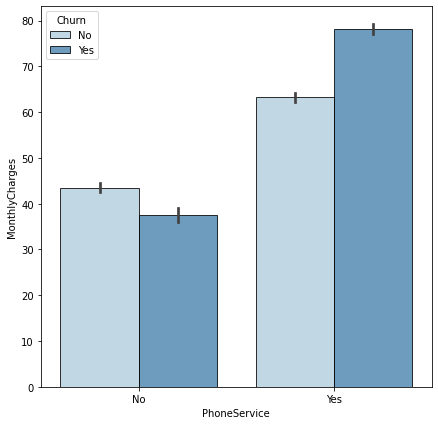

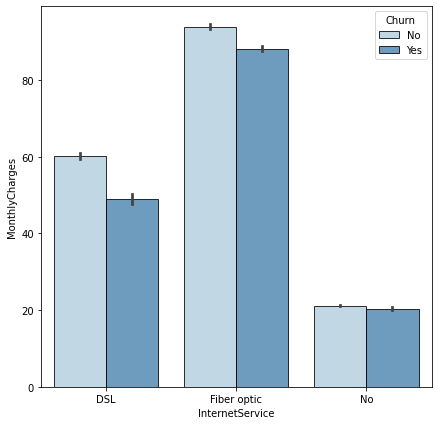

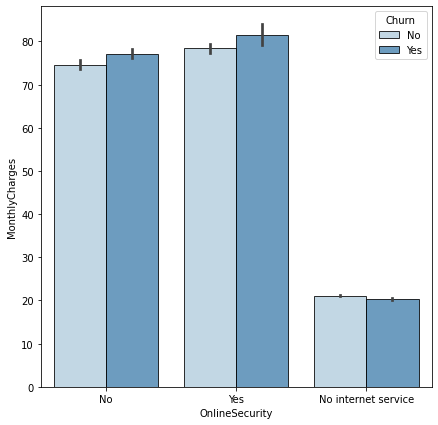

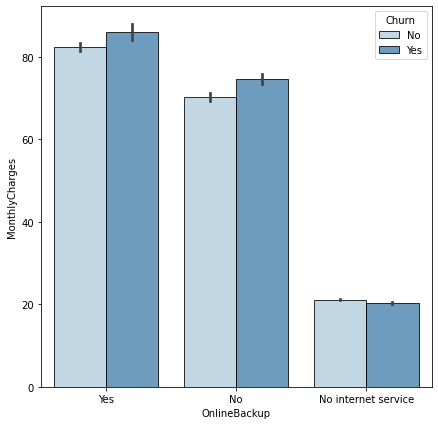

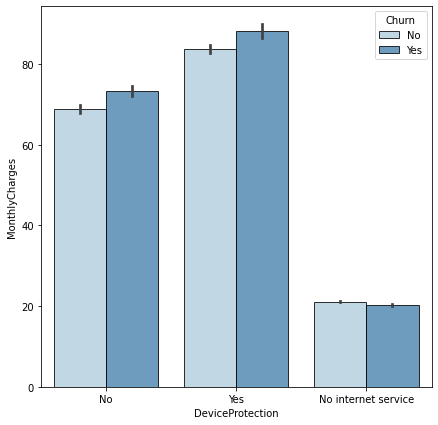

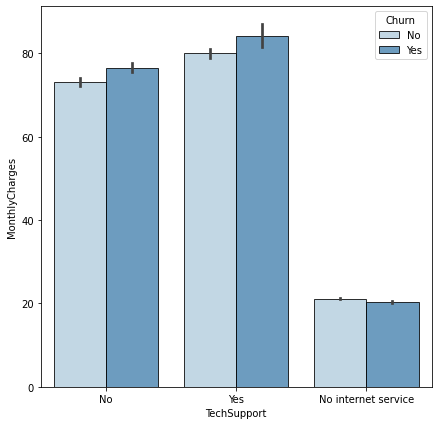

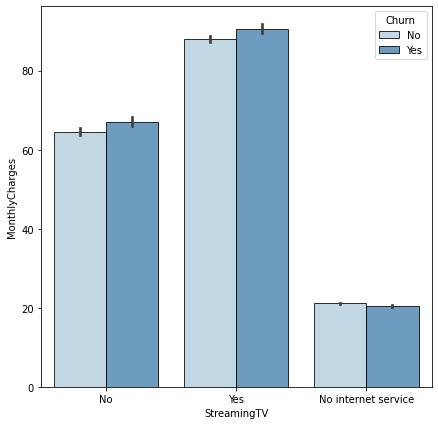

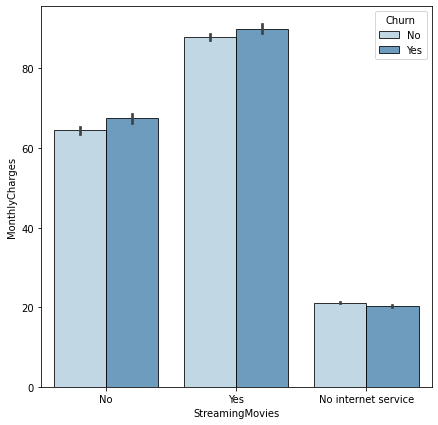

In [66]:
for col in ["PhoneService", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection","TechSupport","StreamingTV", "StreamingMovies"]:
        plt.figure(figsize=(7,7))
        sns.barplot(data = Customer_Info, x = col, y = "MonthlyCharges", hue= "Churn",  palette="Blues", linewidth = 1, alpha = 0.8, edgecolor = "black")
        plt.show()

#### According to the analysis, the 3 servicescontributing to a higher monthly charge and resulting to customers churning are DeviceProtection, StreamingTV and StreamingMovies

### Q2 (b): If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?


In [72]:
Customer_Info.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

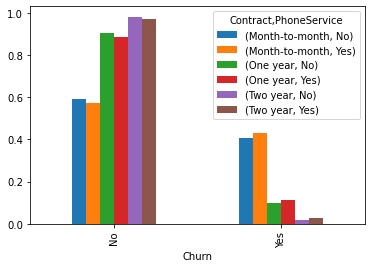

In [73]:
phoneservice = pd.crosstab(Customer_Info.Churn, [Customer_Info.Contract, Customer_Info.PhoneService,], normalize = "columns"). plot(kind = "bar")

#### The Month-to-month contract is the most preferred contract by customers who subscribe to phone service. However, in terms of not churning, the Two year contract would encourage customer retention if the telco was to offer phone as a standalone service.

### Payments

#### Q3 (a): If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be appropriate for the following packages to keep customers from churning:
####  i. Basic
####  ii. Plus
####  iii. Premium

In [80]:
Customer_Info.MonthlyCharges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

#### Q3 (b): Should the company strictly go paperless for their monthly billings as a technique of keeping their customers and why

In [75]:
Customer_Info.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Count'],
      dtype='object')

In [77]:
Customer_Info.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

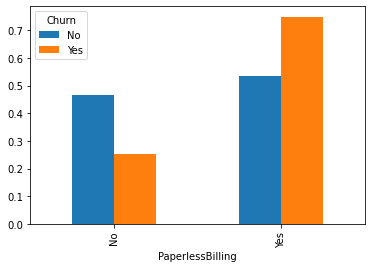

In [78]:
Paperless_df = pd.crosstab(Customer_Info.PaperlessBilling, Customer_Info.Churn, normalize = "columns"). plot(kind = "bar")

#### The company should not strictly go paperless for their monthly billing bacause the analysis shows that customers who use paperless billing are more likely to churn than those who do not use paperless billing  